# Kaggle Data Set, Sector: Finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from datetime import datetime, timedelta
set_style("whitegrid")

In [2]:
# huge dataset with 20 million rows
df = pd.read_csv('historical_stock_prices.csv')
df

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


In [3]:
# getting the codes that tell us what the stocks are; e.g. PIH = Property Insurance Holdings
df2=pd.read_csv('historical_stocks.csv')
df2.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [4]:
# get all the stocks in transportation
finance = df2[df2['sector']=='FINANCE'][['ticker','name']]
finance.sample(10)

,ticker,name
1100,FSFG,"FIRST SAVINGS FINANCIAL GROUP, INC."
5864,IPOA,SOCIAL CAPITAL HEDOSOPHIA HOLDINGS CORP.
1705,JRVR,"JAMES RIVER GROUP HOLDINGS, LTD."
2089,NSEC,"NATIONAL SECURITY GROUP, INC."
3122,VEAC,VANTAGE ENERGY ACQUISITION CORP.
2755,SMBK,"SMARTFINANCIAL, INC."
4608,CO,GLOBAL CORD BLOOD CORPORATION
4999,LM,"LEGG MASON, INC."
2722,BSRR,SIERRA BANCORP
3970,CB,CHUBB LIMITED


In [7]:
# 1022 stocks in finance
finance['ticker'].values

array(['PIH', 'PIHPP', 'TURN', ..., 'XL', 'YRD', 'ZBK'], dtype=object)

In [8]:
def get_stocks(df, df2, stock_code):
    # get prices for a particular stock; this function takes in two data frames where one has the prices
    # the other has the codes
    print(df2[df2['ticker']==stock_code])
    return df[df['ticker']==stock_code].reset_index()

In [9]:
df_PIH=get_stocks(df,df2,'PIH')
df_PIH

  ticker exchange                                    name   sector  \
0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.  FINANCE   

                     industry  
0  PROPERTY-CASUALTY INSURERS  


,index,ticker,open,close,adj_close,low,high,volume,date
0,2386493,PIH,8.000,7.950,7.950,7.900,8.500,642900,2014-04-01
1,2386510,PIH,7.940,8.160,8.160,7.900,8.290,228400,2014-04-02
2,2386515,PIH,8.290,8.390,8.390,8.050,8.400,105000,2014-04-03
3,2386516,PIH,8.500,8.690,8.690,8.320,8.700,113600,2014-04-04
4,2386533,PIH,9.000,8.940,8.940,8.550,9.000,60500,2014-04-07
...,...,...,...,...,...,...,...,...,...
1090,2398342,PIH,7.050,7.097,7.097,6.997,7.097,1600,2018-08-20
1091,2398359,PIH,7.097,7.050,7.050,7.000,7.098,1100,2018-08-21
1092,2398363,PIH,7.000,7.099,7.099,7.000,7.100,3800,2018-08-22
1093,2398379,PIH,7.000,6.979,6.979,6.979,7.000,600,2018-08-23


In [10]:
def add_datetime(df, date):
    # assuming the dataframe has a column with dates as strings, we want to convert them to datetime
    df['date_time'] = df['date'].apply(lambda day: datetime.strptime(day,'%Y-%m-%d').date()) 


In [11]:
add_datetime(df_PIH,'date')

In [12]:
df_PIH.head()

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
0,2386493,PIH,8.00,7.95,7.95,7.90,8.50,642900,2014-04-01,2014-04-01
1,2386510,PIH,7.94,8.16,8.16,7.90,8.29,228400,2014-04-02,2014-04-02
2,2386515,PIH,8.29,8.39,8.39,8.05,8.40,105000,2014-04-03,2014-04-03
3,2386516,PIH,8.50,8.69,8.69,8.32,8.70,113600,2014-04-04,2014-04-04
4,2386533,PIH,9.00,8.94,8.94,8.55,9.00,60500,2014-04-07,2014-04-07


In [13]:
def custom_time_indexing(df, date_column):
    """
    Function to reindex a DataFrame with a custom index that reflects gaps in a time series,
    while keeping the original date column for plotting, without modifying the original DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    date_column (str): Name of the column containing datetime objects.

    Returns:
    pd.DataFrame: A new DataFrame with the custom index reflecting date gaps,
                  while retaining the original dates in a new column.
    list: A list of the original date labels corresponding to valid data rows.
    """
    # Work on a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Ensure the date_column is of datetime type
    df_copy[date_column] = pd.to_datetime(df_copy[date_column])

    # Set the date column as the index
    df_copy.set_index(date_column, inplace=True)

    # Generate the full date range (including missing dates)
    full_range = pd.date_range(start=df_copy.index.min(), end=df_copy.index.max())

    # Reindex the DataFrame to include the full range of dates
    df_reindexed = df_copy.reindex(full_range)

    # Create a custom index that increments by 1, but jumps when there are missing dates
    custom_index = []
    current_index = 1

    for i in range(len(df_reindexed)):
        if i == 0:
            custom_index.append(current_index)
        else:
            # Check if the current date is consecutive to the previous one
            if df_reindexed.index[i] - df_reindexed.index[i-1] > timedelta(days=1):
                # Increase the custom index by the actual day difference
                current_index += (df_reindexed.index[i] - df_reindexed.index[i-1]).days
            else:
                current_index += 1
            custom_index.append(current_index)

    # Assign the custom index to the DataFrame
    df_reindexed['custom_index'] = custom_index

    # Drop the rows where there are missing values
    df_final = df_reindexed.dropna()

    # Add the original date index as a new column and make it a datetime object
    df_final['date_time'] = df_final.index
    df_final['date_time']=df_final['date_time'].apply(lambda day: day.date())

    # Set the new custom index
    df_final.set_index('custom_index', inplace=True)

    # Return the final DataFrame and the valid original dates
    return df_final, df_final['date_time']


In [14]:
# try to ignore warnings
import warnings

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # Ignore all warnings
    df_PIH_reindex,valid_dates = custom_time_indexing(df_PIH, 'date_time')

In [17]:
start_date = df_PIH_reindex.loc[1]['date_time']
end_date = df_PIH_reindex.tail(1)['date_time']

total_days = (end_date - start_date)
total_days.values[0].days


1606

In [18]:
def linspace_dates(df,num_ticks):
    # because of missing dates, we have to do some annoying stuff there are about 14000 days between the first
    # and last day for UNP but some dates are skipped and so we have only 9400 or so datapoints
    # to properly plot, we will get some evenly spaced segments and then get the correct corresponding days

    start_date = df.loc[1]['date_time']
    end_date = df.tail(1)['date_time']
    
    # Calculate the total number of days in the range
    total_days = (end_date - start_date).values[0].days

    # Number of segments
    num_segments = num_ticks-1 # one less than the number of ticks desired

    # Calculate the length of each segment in days
    segment_length = total_days / num_segments

    # Create a list to hold the tick mark dates
    tick_dates = []

    # Calculate the dates for each tick mark
    for i in range(num_segments + 1):
        tick_date = start_date + timedelta(days=segment_length * i)
        tick_dates.append(tick_date)

    # Convert tick_dates to a list of strings for labeling
    tick_labels = [date.strftime('%Y-%m-%d') for date in tick_dates]

    # return the tick dates and labels
    return tick_dates, tick_labels


In [19]:
PIH_tick_dates, PIH_tick_labels = linspace_dates(df_PIH_reindex,10)

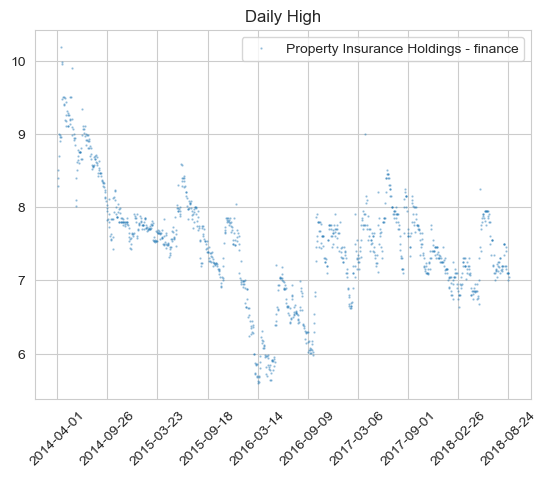

In [21]:
# we can plot Union Pacific now with the missing dates, it seems to know to plot the years on the x-axis now
# the issue is that it's not correctly spaced; the skips in time might not always be the same amount
#plt.plot(df_UNP.index,df_UNP['high'],label='Union Pacific - transportation',alpha=0.4)

plt.scatter(df_PIH_reindex.index,df_PIH_reindex['high'],label='Property Insurance Holdings - finance',alpha=0.4,s=0.4)
plt.title('Daily High')

num_entries = df_PIH_reindex.index.max()

# Set a desired number of ticks; in the cell above, we had num_segments = 9 (one less than num_ticks)
num_ticks = 10

# Generate equally spaced tick positions
PIH_tick_positions = np.linspace(0, num_entries - 1, num_ticks).astype(int)

# Set the ticks and their corresponding labels from the original dates
plt.xticks(ticks=PIH_tick_positions, labels=PIH_tick_labels, rotation=45)

# Set x-axis limits to span the full range of the custom index
#plt.xlim(df_UNP_reindex.index.min(), df_UNP_reindex.index.max())

plt.legend()
plt.show()

# Daylight Savings

We now begin to study DST

In [30]:
DST = pd.read_csv('DaylightSavingsTimeChangeDates_1971-2024.csv')

In [31]:
# Adding 1970 date
new_row = pd.DataFrame({'Year': [1970], 'Day of Week': ['Sunday'], 'Date': ['26 April'], 'Time before change': ['2:00'], 'Time after change':['3:00'],'Day of Week.1':['Sunday'], 'Date.1': ['25 October'], 'Time before change.1': ['2:00'], 'Time after change.1':['1:00']})

In [32]:
# Prepend the row using pd.concat()
DST = pd.concat([new_row, DST], ignore_index=True)

In [33]:
DST.head(2)

,Year,Day of Week,Date,Time before change,Time after change,Day of Week.1,Date.1,Time before change.1,Time after change.1
0,1970,Sunday,26 April,2:00,3:00,Sunday,25 October,2:00,1:00
1,1971,Sunday,25 April,2:00,3:00,Sunday,31 October,2:00,1:00


In [34]:
dst_spring_dates = pd.to_datetime(DST.Date+" "+DST.Year.astype(str))
dst_fall_dates = pd.to_datetime(DST['Date.1']+" "+DST.Year.astype(str))

In [35]:
dst_mon_spring = dst_spring_dates+pd.DateOffset(1)
dst_fri_spring = dst_spring_dates+pd.DateOffset(-2)

In [36]:
dst_mon_fall = dst_fall_dates+pd.DateOffset(1)
dst_fri_fall = dst_fall_dates+pd.DateOffset(-2)

In [37]:
# make the object datetime instead of timestamp
dst_mon_spring=dst_mon_spring.apply(lambda day: day.date())
dst_fri_spring=dst_fri_spring.apply(lambda day: day.date())

dst_mon_fall=dst_mon_fall.apply(lambda day: day.date())
dst_fri_fall=dst_fri_fall.apply(lambda day: day.date())


In [38]:
DST_fri_mon = pd.concat([pd.DataFrame(dst_fri_spring),pd.DataFrame(dst_mon_spring),pd.DataFrame(dst_fri_fall),pd.DataFrame(dst_mon_fall)],axis=1)

In [39]:
DST_fri_mon.columns = ['spring_fri_before','spring_mon_after','fall_fri_before','fall_mon_after']

In [40]:
# now we have this in a .csv file; but when using it, we probably want to get the columns to be
# datetime objects, not just strings
DST_fri_mon.to_csv('DST_fri_mon.csv')

In [41]:
DST_fri_mon

,spring_fri_before,spring_mon_after,fall_fri_before,fall_mon_after
0,1970-04-24,1970-04-27,1970-10-23,1970-10-26
1,1971-04-23,1971-04-26,1971-10-29,1971-11-01
2,1972-04-28,1972-05-01,1972-10-27,1972-10-30
3,1973-04-27,1973-04-30,1973-10-26,1973-10-29
4,1974-01-04,1974-01-07,1974-10-25,1974-10-28
5,1975-02-21,1975-02-24,1975-10-24,1975-10-27
6,1976-04-23,1976-04-26,1976-10-29,1976-11-01
7,1977-04-22,1977-04-25,1977-10-28,1977-10-31
8,1978-04-28,1978-05-01,1978-10-27,1978-10-30
9,1979-04-27,1979-04-30,1979-10-26,1979-10-29


In [42]:
df_UNP_reindex

,index,ticker,open,close,adj_close,low,high,volume,date,date_time
custom_index,,,,,,,,,,
1,20706536.0,UNP,3.010041,3.015294,0.017573,3.010041,3.052066,1165600.0,1980-01-02,1980-01-02
2,20706538.0,UNP,2.994281,2.973269,0.017328,2.947003,2.994281,1453600.0,1980-01-03,1980-01-03
3,20706540.0,UNP,2.978522,3.025800,0.017634,2.978522,3.025800,1382400.0,1980-01-04,1980-01-04
6,20706542.0,UNP,3.025800,3.010041,0.017542,3.010041,3.052066,1087200.0,1980-01-07,1980-01-07
7,20706544.0,UNP,3.010041,2.899725,0.016899,2.899725,3.036306,1213200.0,1980-01-08,1980-01-08
...,...,...,...,...,...,...,...,...,...,...
14111,20723264.0,UNP,150.220001,150.850006,150.850006,150.139999,151.789993,3275000.0,2018-08-20,2018-08-20
14112,20723266.0,UNP,150.789993,151.559998,151.559998,150.619995,151.970001,3061300.0,2018-08-21,2018-08-21
14113,20723268.0,UNP,151.130005,150.320007,150.320007,150.210007,151.440002,2395700.0,2018-08-22,2018-08-22


In [43]:
# this is to see if we have the price data for the Fridays before spring DST
# we'll see that for UNP, the data we have begins in 1980 and ends in 2018

for date in DST_fri_mon['spring_fri_before'].values:
    if df_UNP_reindex['date_time'].isin([date]).any():
        print('Have data for:', date.strftime('%Y-%m-%d'))
    else:
        print('Missing data for:', date.strftime('%Y-%m-%d'))

Missing data for: 1970-04-24
Missing data for: 1971-04-23
Missing data for: 1972-04-28
Missing data for: 1973-04-27
Missing data for: 1974-01-04
Missing data for: 1975-02-21
Missing data for: 1976-04-23
Missing data for: 1977-04-22
Missing data for: 1978-04-28
Missing data for: 1979-04-27
Have data for: 1980-04-25
Have data for: 1981-04-24
Have data for: 1982-04-23
Have data for: 1983-04-22
Have data for: 1984-04-27
Have data for: 1985-04-26
Have data for: 1986-04-25
Have data for: 1987-04-03
Missing data for: 1988-04-01
Have data for: 1989-03-31
Have data for: 1990-03-30
Have data for: 1991-04-05
Have data for: 1992-04-03
Have data for: 1993-04-02
Missing data for: 1994-04-01
Have data for: 1995-03-31
Missing data for: 1996-04-05
Have data for: 1997-04-04
Have data for: 1998-04-03
Missing data for: 1999-04-02
Have data for: 2000-03-31
Have data for: 2001-03-30
Have data for: 2002-04-05
Have data for: 2003-04-04
Have data for: 2004-04-02
Have data for: 2005-04-01
Have data for: 2006-03

In [44]:
# VERY USEFUL function for getting the stock prices; need dataframe, spring/fall, metric

def get_dst_fri_mon_prices(df,season,fri_metric,mon_metric):
    # season = spring/fall
    # metric1,2 = high, low, open, close, volume, etc.
    dst_mon_fri_prices=[]
    fri_str = season + '_fri_before'
    mon_str = season + '_mon_after'

    for fri,mon in zip(DST_fri_mon[fri_str].values, DST_fri_mon[mon_str].values):
        if (fri in df['date_time'].values) and (mon in df['date_time'].values):
            print('Have data for both:',fri.strftime('%Y-%m-%d'), mon.strftime('%Y-%m-%d'))

            fri_price=df.loc[df['date_time'] == fri, fri_metric].values[0]
            mon_price=df.loc[df['date_time'] == mon, mon_metric].values[0]
            
            dst_mon_fri_prices.append((fri,mon,fri_price,mon_price))
        else:
            print('Missing data for at least one of:', fri.strftime('%Y-%m-%d'), mon.strftime('%Y-%m-%d')) 
    return dst_mon_fri_prices 

In [45]:
df_UNP_spring_high=get_dst_fri_mon_prices(df_UNP_reindex,'spring','high','high')

Missing data for at least one of: 1970-04-24 1970-04-27
Missing data for at least one of: 1971-04-23 1971-04-26
Missing data for at least one of: 1972-04-28 1972-05-01
Missing data for at least one of: 1973-04-27 1973-04-30
Missing data for at least one of: 1974-01-04 1974-01-07
Missing data for at least one of: 1975-02-21 1975-02-24
Missing data for at least one of: 1976-04-23 1976-04-26
Missing data for at least one of: 1977-04-22 1977-04-25
Missing data for at least one of: 1978-04-28 1978-05-01
Missing data for at least one of: 1979-04-27 1979-04-30
Have data for both: 1980-04-25 1980-04-28
Have data for both: 1981-04-24 1981-04-27
Have data for both: 1982-04-23 1982-04-26
Have data for both: 1983-04-22 1983-04-25
Have data for both: 1984-04-27 1984-04-30
Have data for both: 1985-04-26 1985-04-29
Have data for both: 1986-04-25 1986-04-28
Have data for both: 1987-04-03 1987-04-06
Missing data for at least one of: 1988-04-01 1988-04-04
Have data for both: 1989-03-31 1989-04-03
Have d

In [46]:
# put in dataframe for nicer viewing; I didn't have it return a dataframe because
# it seems to mess with the datetime object in weird ways
pd.DataFrame(df_UNP_spring_high)

,0,1,2,3
0,1980-04-25,1980-04-28,3.246431,3.230672
1,1981-04-24,1981-04-27,5.000975,5.011481
2,1982-04-23,1982-04-26,3.204406,3.172888
3,1983-04-22,1983-04-25,4.307562,4.286550
4,1984-04-27,1984-04-30,4.097437,4.097437
5,1985-04-26,1985-04-29,4.118450,4.160475
6,1986-04-25,1986-04-28,4.444144,4.433638
7,1987-04-03,1987-04-06,6.660963,6.692481
8,1989-03-31,1989-04-03,5.578819,5.578819
9,1990-03-30,1990-04-02,6.093625,6.072612


In [47]:
UNP_spring_high_diff = []
for i in range(len(df_UNP_spring_high)):
    UNP_spring_high_diff.append(df_UNP_spring_high[i][2]-df_UNP_spring_high[i][3])

UNP_spring_high_diff

[0.015759468078619943,
 -0.010506153106680571,
 0.031518697738650125,
 0.021012306213379794,
 0.0,
 -0.04202461242675959,
 0.010506153106689453,
 -0.031518459320070136,
 0.0,
 0.021012783050539774,
 -0.031518459320070136,
 -0.2311372756957999,
 -0.23113727569580078,
 -0.08405017852784091,
 -0.1875,
 0.015625,
 0.0,
 -0.14249992370599962,
 0.1724996566771999,
 -0.5424995422362997,
 0.20750045776369852,
 0.21000099182130327,
 -0.47249984741210227,
 -0.3850002288818004,
 0.40250015258789773,
 0.7700004577637003,
 -0.06000137329099431,
 0.20999908447269888,
 0.514999389648402,
 -0.43000030517580967,
 0.525001525878892,
 0.37999725341799717,
 -0.0900039672850994,
 0.19999694824299752,
 -0.4400024414070174]

In [48]:
df_UNP_spring_vol = get_dst_fri_mon_prices(df_UNP_reindex,'spring','volume','volume')

Missing data for at least one of: 1970-04-24 1970-04-27
Missing data for at least one of: 1971-04-23 1971-04-26
Missing data for at least one of: 1972-04-28 1972-05-01
Missing data for at least one of: 1973-04-27 1973-04-30
Missing data for at least one of: 1974-01-04 1974-01-07
Missing data for at least one of: 1975-02-21 1975-02-24
Missing data for at least one of: 1976-04-23 1976-04-26
Missing data for at least one of: 1977-04-22 1977-04-25
Missing data for at least one of: 1978-04-28 1978-05-01
Missing data for at least one of: 1979-04-27 1979-04-30
Have data for both: 1980-04-25 1980-04-28
Have data for both: 1981-04-24 1981-04-27
Have data for both: 1982-04-23 1982-04-26
Have data for both: 1983-04-22 1983-04-25
Have data for both: 1984-04-27 1984-04-30
Have data for both: 1985-04-26 1985-04-29
Have data for both: 1986-04-25 1986-04-28
Have data for both: 1987-04-03 1987-04-06
Missing data for at least one of: 1988-04-01 1988-04-04
Have data for both: 1989-03-31 1989-04-03
Have d

In [49]:
UNP_spring_vol_diff = []
for i in range(len(df_UNP_spring_vol)):
    UNP_spring_vol_diff.append(df_UNP_spring_vol[i][2]-df_UNP_spring_vol[i][3])

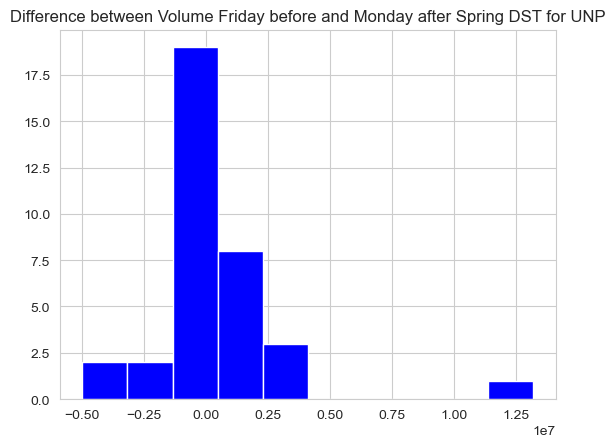

In [50]:
# have 35 years of data for UNP; the scale is quite large for volume: 1e7
plt.hist(UNP_spring_vol_diff,color='b')
plt.title('Difference between Volume Friday before and Monday after Spring DST for UNP')
plt.show()

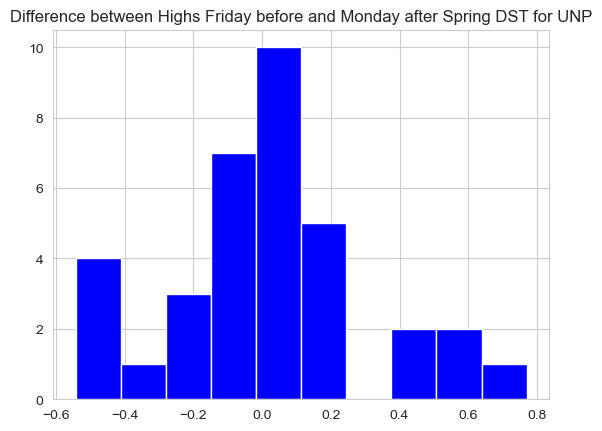

In [51]:
# have 35 years of data for UNP
plt.hist(UNP_spring_high_diff,color='b')
plt.title('Difference between Highs Friday before and Monday after Spring DST for UNP')
plt.show()

In [52]:
df_UNP_fall_high = get_dst_fri_mon_prices(df_UNP_reindex,'fall','high','high')

Missing data for at least one of: 1970-10-23 1970-10-26
Missing data for at least one of: 1971-10-29 1971-11-01
Missing data for at least one of: 1972-10-27 1972-10-30
Missing data for at least one of: 1973-10-26 1973-10-29
Missing data for at least one of: 1974-10-25 1974-10-28
Missing data for at least one of: 1975-10-24 1975-10-27
Missing data for at least one of: 1976-10-29 1976-11-01
Missing data for at least one of: 1977-10-28 1977-10-31
Missing data for at least one of: 1978-10-27 1978-10-30
Missing data for at least one of: 1979-10-26 1979-10-29
Have data for both: 1980-10-24 1980-10-27
Have data for both: 1981-10-23 1981-10-26
Have data for both: 1982-10-29 1982-11-01
Have data for both: 1983-10-28 1983-10-31
Have data for both: 1984-10-26 1984-10-29
Have data for both: 1985-10-25 1985-10-28
Have data for both: 1986-10-24 1986-10-27
Have data for both: 1987-10-23 1987-10-26
Have data for both: 1988-10-28 1988-10-31
Have data for both: 1989-10-27 1989-10-30
Have data for both: 

In [53]:
UNP_fall_high_diff = []
for i in range(len(df_UNP_fall_high)):
    UNP_fall_high_diff.append(df_UNP_fall_high[i][2]-df_UNP_fall_high[i][3])

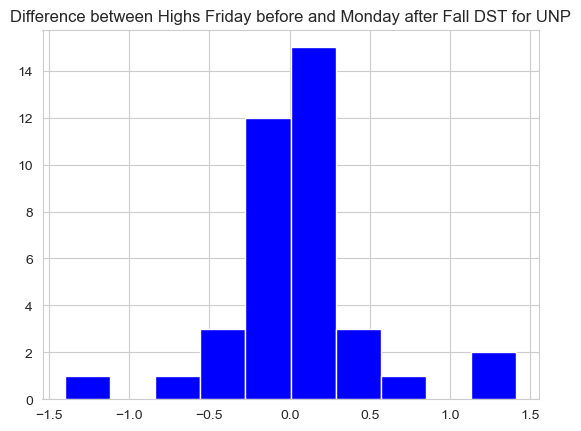

In [54]:
# have 35 years of data for UNP
plt.hist(UNP_fall_high_diff,color='b')
plt.title('Difference between Highs Friday before and Monday after Fall DST for UNP')
plt.show()

In [55]:
df_CP_spring_vol = get_dst_fri_mon_prices(df_CP_reindex,'spring','volume','volume')

Missing data for at least one of: 1970-04-24 1970-04-27
Missing data for at least one of: 1971-04-23 1971-04-26
Missing data for at least one of: 1972-04-28 1972-05-01
Missing data for at least one of: 1973-04-27 1973-04-30
Missing data for at least one of: 1974-01-04 1974-01-07
Missing data for at least one of: 1975-02-21 1975-02-24
Missing data for at least one of: 1976-04-23 1976-04-26
Missing data for at least one of: 1977-04-22 1977-04-25
Missing data for at least one of: 1978-04-28 1978-05-01
Missing data for at least one of: 1979-04-27 1979-04-30
Missing data for at least one of: 1980-04-25 1980-04-28
Missing data for at least one of: 1981-04-24 1981-04-27
Missing data for at least one of: 1982-04-23 1982-04-26
Missing data for at least one of: 1983-04-22 1983-04-25
Have data for both: 1984-04-27 1984-04-30
Have data for both: 1985-04-26 1985-04-29
Have data for both: 1986-04-25 1986-04-28
Have data for both: 1987-04-03 1987-04-06
Missing data for at least one of: 1988-04-01 198

In [56]:
CP_spring_vol_diff = []
for i in range(len(df_CP_spring_vol)):
    CP_spring_vol_diff.append(df_CP_spring_vol[i][2]-df_CP_spring_vol[i][3])

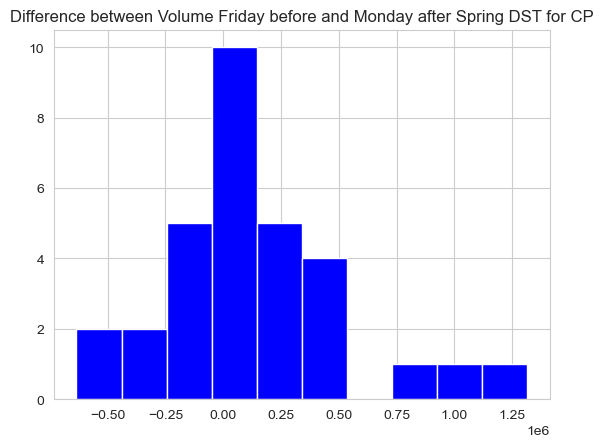

In [57]:
# have 35 years of data for UNP; the scale is quite large for volume: 1e7
plt.hist(CP_spring_vol_diff,color='b')
plt.title('Difference between Volume Friday before and Monday after Spring DST for CP')
plt.show()

In [58]:
# for suppressing what a function prints out as part of debugging
import contextlib
import io

# Suppressing the print output
with contextlib.redirect_stdout(io.StringIO()):
    df_CP_spring_high=get_dst_fri_mon_prices(df_CP_reindex,'spring','high','high')

In [59]:
CP_spring_high_diff = []
for i in range(len(df_CP_spring_high)):
    CP_spring_high_diff.append(df_CP_spring_high[i][2]-df_CP_spring_high[i][3])

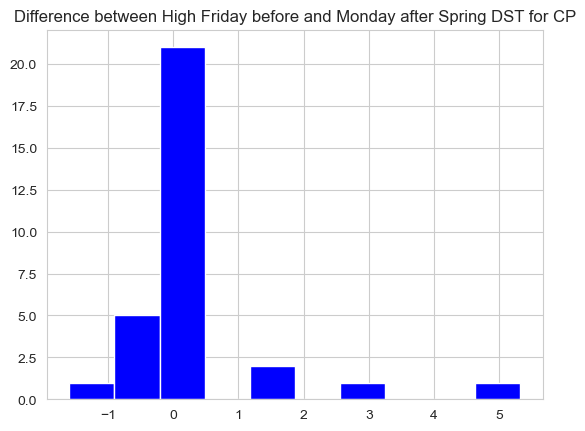

In [60]:
# have 35 years of data for UNP
plt.hist(CP_spring_high_diff,color='b')
plt.title('Difference between High Friday before and Monday after Spring DST for CP')
plt.show()

# Transportation Sector

We'll now try and study the entire transportation sector.

In [61]:
transportation['ticker'].values

array(['AIRT', 'ATSG', 'ALGT', 'AAL', 'ARCB', 'AAWW', 'CHRW', 'CPLP',
       'CVTI', 'CYRX', 'CYRXW', 'CSX', 'DCIX', 'DRYS', 'EGLE', 'ECHO',
       'ESEA', 'EXPD', 'FWRD', 'GLBS', 'OMAB', 'HA', 'HTLD', 'HUBG',
       'HUNT', 'HUNTU', 'HUNTW', 'JBHT', 'JBLU', 'LSTR', 'MRTN', 'ODFL',
       'PTSI', 'PANL', 'PATI', 'PHII', 'PHIIK', 'PXS', 'RYAAY', 'SAIA',
       'SHIP', 'SHIPW', 'SINO', 'SKYW', 'SBLK', 'SBLKZ', 'GASS', 'TOPS',
       'TRMD', 'ULH', 'USAK', 'WERN', 'YRCW', 'ALK', 'ASC', 'AVH', 'AZUL',
       'BSTI', 'BCO', 'BRS', 'CNI', 'CP', 'CEA', 'ZNH', 'VLRS', 'CPA',
       'CAAP', 'CMRE', 'DAC', 'DAL', 'DHT', 'DSX', 'DSXN', 'LPG', 'ERA',
       'EURN', 'FDX', 'FRO', 'GNK', 'GNRT', 'GWR', 'GSL', 'GOL', 'PAC',
       'ASR', 'GSH', 'KSU', 'KSU^', 'KNX', 'LTM', 'NVGS', 'NNA', 'NM',
       'NMM', 'NAO', 'NSC', 'OSG', 'RRTS', 'SB', 'SNDR', 'SALT', 'SLTB',
       'SBBC', 'SBNA', 'STNG', 'CKH', 'SMHI', 'SSW', 'SSWA', 'SSWN',
       'SFL', 'LUV', 'SAVE', 'TK', 'TNP', 'UNP', 'UAL', 'UPS', 'USDP

In [62]:
# need to skip empty dataframes like this
df_CYRXW=get_stocks(df,df2,'CYRXW')
df_CYRXW.empty

    ticker exchange            name          sector                industry
787  CYRXW   NASDAQ  CRYOPORT, INC.  TRANSPORTATION  OIL REFINING/MARKETING


True

In [63]:
%%time
# Getting all the transportation sector data for differences between
# Friday before and Monday after in the Spring Highs
# we also suppress the debugging prints from functions

transport_spring_high_diff=[]
for stock in transportation['ticker'].values:
    with contextlib.redirect_stdout(io.StringIO()):
        df_stock = get_stocks(df,df2,stock)
    if df_stock.empty:
        print("Skipping empty DataFrame:", stock)
        continue 
    
    add_datetime(df_stock,'date')
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # Ignore all warnings
        df_stock_reindex=custom_time_indexing(df_stock, 'date_time')[0]

    #df_stock_reindex['date_time'] = pd.to_datetime(df_stock_reindex['date_time'])
    with contextlib.redirect_stdout(io.StringIO()):
        df_stock_spring_high=get_dst_fri_mon_prices(df_stock_reindex,'spring','high','high')

    for i in range(len(df_stock_spring_high)):
        transport_spring_high_diff.append(df_stock_spring_high[i][2]-df_stock_spring_high[i][3])


Skipping empty DataFrame: CYRXW
Skipping empty DataFrame: HUNTU
Skipping empty DataFrame: HUNTW
Skipping empty DataFrame: SHIPW
Skipping empty DataFrame: GNRT
Skipping empty DataFrame: KSU^
Skipping empty DataFrame: SBBC
Skipping empty DataFrame: SSWA
CPU times: user 3min 35s, sys: 4.76 s, total: 3min 40s
Wall time: 3min 49s


In [64]:
# there are some precipitous changes but those are outliers
print(min(transport_spring_high_diff))
print(max(transport_spring_high_diff))


-1050.0
3900.0


In [65]:
#for dealing with outliers

ones=0
tens=0
hundreds=0
thousands=0
for val in transport_spring_high_diff:
    if abs(val) <10:
        ones+=1
    if 10<=abs(val) <100:
        tens+=1
        # we remove all occurrences of the value if it's too large
        transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))
    if 100<= abs(val) <1000:
        hundreds+=1
        transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))    
    if 1000<= abs(val):
        thousands+=1
        transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))

print(ones,tens,hundreds,thousands)
len(transport_spring_high_diff)
# in the end, we removed 16 outliers out of 1555, about 1% of the values

1539 4 6 6


1539

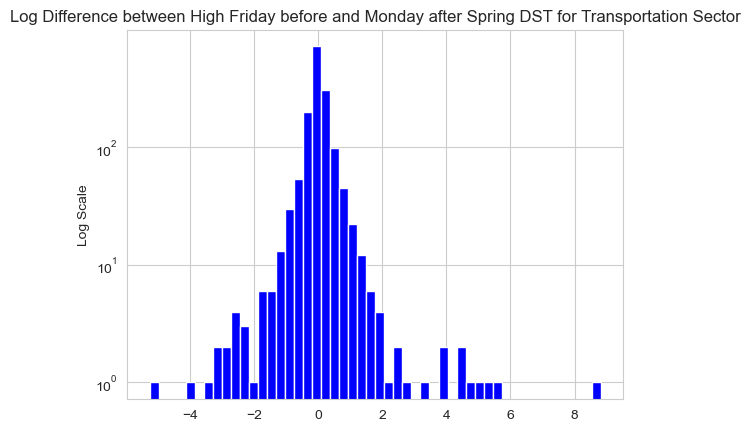

In [66]:
#bins=range(min(data), max(data) + binwidth, binwidth)

plt.hist(transport_spring_high_diff,color='b',bins=50,log=True)
plt.title('Log Difference between High Friday before and Monday after Spring DST for Transportation Sector')
plt.ylabel('Log Scale')
plt.show()

The next thing to do is get some data for other weekends and compare it to the time change weekends. I'll have to make a function that gets weekends which are not DST nor holiday.

We'll now try to bring in other weekends. If there is a holiday, the market is closed and we will automatically not have the data for it.

In [67]:
weekends=pd.read_csv('weekends1970_2018.csv')
weekends.head()

,Unnamed: 0,Fridays,Mondays
0,0,1970-01-02,1970-01-05
1,1,1970-01-09,1970-01-12
2,2,1970-01-16,1970-01-19
3,3,1970-01-23,1970-01-26
4,4,1970-01-30,1970-02-02


In [68]:
DST_fri_mon.head()

,spring_fri_before,spring_mon_after,fall_fri_before,fall_mon_after
0,1970-04-24,1970-04-27,1970-10-23,1970-10-26
1,1971-04-23,1971-04-26,1971-10-29,1971-11-01
2,1972-04-28,1972-05-01,1972-10-27,1972-10-30
3,1973-04-27,1973-04-30,1973-10-26,1973-10-29
4,1974-01-04,1974-01-07,1974-10-25,1974-10-28


In [69]:
# ANOTHER VERY USEFUL function for getting the stock prices of all non-DST weekends; need dataframe and metrics

def get_non_dst_fri_mon_prices(df,fri_metric,mon_metric):
    # metric1,2 = high, low, open, close, volume, etc.
    mon_fri_prices=[]

    spring_fri = 'spring_fri_before'
    spring_mon = 'spring_mon_after'
    fall_fri = 'fall_fri_before'
    fall_mon = 'fall_mon_after'

    for fri,mon in zip(weekends['Fridays'].values, weekends['Mondays'].values): # I stored these as strings
        fri = datetime.strptime(fri, '%Y-%m-%d').date()
        mon = datetime.strptime(mon, '%Y-%m-%d').date()

        if (fri in df['date_time'].values) and (mon in df['date_time'].values) and \
            ((fri,mon) not in zip(DST_fri_mon[spring_fri].values, DST_fri_mon[spring_mon].values)) and \
                ((fri,mon) not in zip(DST_fri_mon[fall_fri].values, DST_fri_mon[fall_mon].values)):
            print('Have data for both:',fri, mon)
            
            fri_price=df.loc[df['date_time'] == fri, fri_metric].values[0]
            mon_price=df.loc[df['date_time'] == mon, mon_metric].values[0]
            
            mon_fri_prices.append((fri.strftime('%Y-%m-%d'),mon.strftime('%Y-%m-%d'),fri_price,mon_price))
       
        elif ((fri,mon) in zip(DST_fri_mon[spring_fri].values, DST_fri_mon[spring_mon].values)) or \
                ((fri,mon) in zip(DST_fri_mon[fall_fri].values, DST_fri_mon[fall_mon].values)):
            print('These are Friday and Monday around a DST date:', fri, mon)
       
        else:
            print('Missing data for at least one of:', fri, mon) 
    return mon_fri_prices 

In [70]:
%%time

with contextlib.redirect_stdout(io.StringIO()):
    UNP_non_dst_weekends=get_non_dst_fri_mon_prices(df_UNP_reindex,'open','close')

CPU times: user 5.28 s, sys: 122 ms, total: 5.4 s
Wall time: 5.81 s


In [71]:
with contextlib.redirect_stdout(io.StringIO()):
    UNP_spring_dst_open_close = get_dst_fri_mon_prices(df_UNP_reindex,'spring','open','close')
    UNP_fall_dst_open_close = get_dst_fri_mon_prices(df_UNP_reindex,'fall','open','close')

In [72]:
UNP_dst_diff = []
for i in range(len(UNP_spring_dst_open_close)):
    UNP_dst_diff.append(UNP_spring_dst_open_close[i][2]-UNP_spring_dst_open_close[i][3])

for i in range(len(UNP_fall_dst_open_close)):
    UNP_dst_diff.append(UNP_fall_dst_open_close[i][2]-UNP_fall_dst_open_close[i][3])

In [73]:
UNP_non_dst_weekends_diff=[]
for i in range(len(UNP_non_dst_weekends)):
    UNP_non_dst_weekends_diff.append(UNP_non_dst_weekends[i][2]-UNP_non_dst_weekends[i][3])


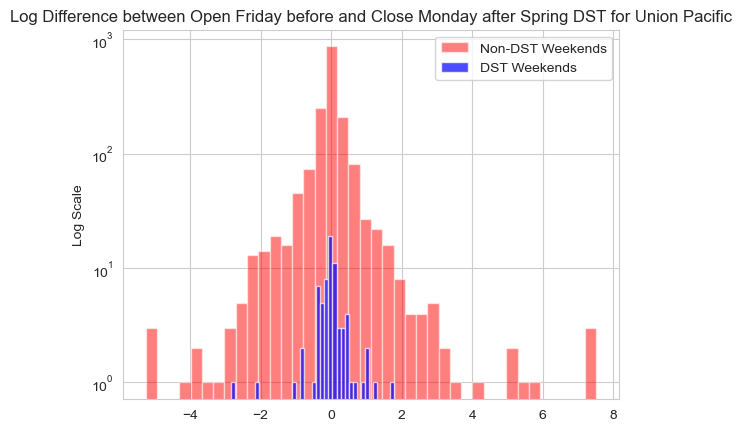

In [74]:
# plotting the differences between open Friday and close Monday for DST and non-DST weekends
# the bin widths are different because the spread is different between the two

plt.hist(UNP_non_dst_weekends_diff,color='r',bins=40,log=True,alpha=0.5, label='Non-DST Weekends')

plt.hist(UNP_dst_diff,color='b',bins=40,log=True,alpha=0.7, label='DST Weekends')

plt.title('Log Difference between Open Friday before and Close Monday after Spring DST for Union Pacific')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

In [75]:
# the variances for non-DST and DST weekends of the difference between open Friday and close Monday 
# seems that there is more variance for non-DST for Union Pacific stock prices

print(np.var(UNP_non_dst_weekends_diff))
print(np.var(UNP_dst_diff))

print(np.mean(UNP_non_dst_weekends_diff))
print(np.mean(UNP_dst_diff))

print(np.median(UNP_non_dst_weekends_diff))
print(np.median(UNP_dst_diff))


0.6381402028498192
0.3569370995197208
-0.00623095042560789
-0.022015307047576864
0.0
-0.021012306213380683


In [76]:
UNP_dst_diff_perc = []
for i in range(len(UNP_spring_dst_open_close)):
    UNP_dst_diff_perc.append((UNP_spring_dst_open_close[i][2]-UNP_spring_dst_open_close[i][3])/UNP_spring_dst_open_close[i][2])

for i in range(len(UNP_fall_dst_open_close)):
    UNP_dst_diff_perc.append((UNP_fall_dst_open_close[i][2]-UNP_fall_dst_open_close[i][3])/UNP_fall_dst_open_close[i][2])

In [77]:
UNP_non_dst_weekends_diff_perc=[]
for i in range(len(UNP_non_dst_weekends)):
    UNP_non_dst_weekends_diff_perc.append((UNP_non_dst_weekends[i][2]-UNP_non_dst_weekends[i][3])/UNP_non_dst_weekends[i][2])


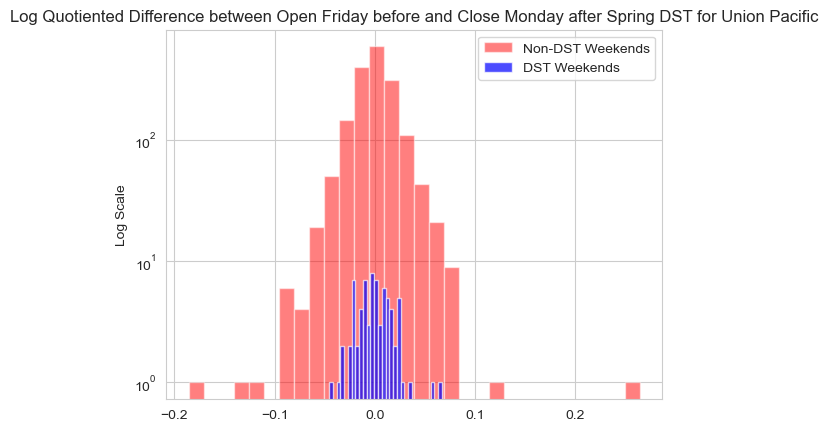

In [78]:
# plotting the quotiented differences between open Friday and close Monday for DST and non-DST weekends
# the bin widths are different because the spread is different between the two

plt.hist(UNP_non_dst_weekends_diff_perc,color='r',bins=30,log=True,alpha=0.5, label='Non-DST Weekends')

plt.hist(UNP_dst_diff_perc,color='b',bins=30,log=True,alpha=0.7, label='DST Weekends')

plt.title('Log Quotiented Difference between Open Friday before and Close Monday after Spring DST for Union Pacific')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

In [79]:
# the variances for non-DST and DST weekends of the QUOTIENTED difference between open Friday and close Monday 
# seems that there is more variance for non-DST for Union Pacific stock prices

print(np.var(UNP_non_dst_weekends_diff_perc))
print(np.var(UNP_dst_diff_perc))

print(np.mean(UNP_non_dst_weekends_diff_perc))
print(np.mean(UNP_dst_diff_perc))

print(np.median(UNP_non_dst_weekends_diff_perc))
print(np.median(UNP_dst_diff_perc))

0.0005653646530763559
0.0003781127758060204
-0.00010898801123349929
-9.502114767750892e-05
0.0
-0.0015109973315990007


# Working with all weekends for transportation sector

In [80]:
%%time
# Getting all the transportation sector data for differences between
# open price Friday before and close price Monday after 
# we also suppress the debugging prints from functions

transport_dst_diff=[]

transport_non_dst_diff=[]

for stock in transportation['ticker'].values:
    with contextlib.redirect_stdout(io.StringIO()):
        df_stock = get_stocks(df,df2,stock)
    if df_stock.empty:
        print("Skipping empty DataFrame:", stock)
        continue 
    
    add_datetime(df_stock,'date')
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # Ignore all warnings
        df_stock_reindex = custom_time_indexing(df_stock, 'date_time')[0]

    with contextlib.redirect_stdout(io.StringIO()):
        # DST
        df_stock_dst_spring = get_dst_fri_mon_prices(df_stock_reindex,'spring','open','close')
        df_stock_dst_fall = get_dst_fri_mon_prices(df_stock_reindex,'fall','open','close')

        #non-DST
        df_stock_non_dst_weekends = get_non_dst_fri_mon_prices(df_stock_reindex,'open','close')


    for i in range(len(df_stock_dst_spring)):
        transport_dst_diff.append(df_stock_dst_spring[i][2]-df_stock_dst_spring[i][3])

    for j in range(len(df_stock_dst_fall)):
        transport_dst_diff.append(df_stock_dst_fall[j][2]-df_stock_dst_fall[j][3])

    for k in range(len(df_stock_non_dst_weekends)):
        transport_non_dst_diff.append(df_stock_non_dst_weekends[k][2]-df_stock_non_dst_weekends[k][3])

Skipping empty DataFrame: CYRXW
Skipping empty DataFrame: HUNTU
Skipping empty DataFrame: HUNTW
Skipping empty DataFrame: SHIPW
Skipping empty DataFrame: GNRT
Skipping empty DataFrame: KSU^
Skipping empty DataFrame: SBBC
Skipping empty DataFrame: SSWA
CPU times: user 6min 41s, sys: 6.69 s, total: 6min 48s
Wall time: 7min 3s


In [81]:
max(transport_non_dst_diff)

27753.6015625

In [82]:
transport_non_dst_diff.remove(max(transport_non_dst_diff))

In [83]:
#for dealing with outliers in non-DST data

ones=0
#tens=0
#hundreds=0
thousands=0
for val in transport_non_dst_diff:
    if abs(val) <10:
        ones+=1
    #if 10<=abs(val) <100:
     #   tens+=1
        # we remove all occurrences of the value if it's too large
      #  transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))
    #if 100<= abs(val) <1000:
     #   hundreds+=1
      #  transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))    
    if 1000<= abs(val):
        thousands+=1
        transport_non_dst_diff = list(filter(lambda x: x != val, transport_non_dst_diff))

print(ones,thousands)
len(transport_non_dst_diff)


70348 244


70997

In [84]:
#for dealing with outliers in DST data

ones=0
#tens=0
#hundreds=0
thousands=0
for val in transport_dst_diff:
    if abs(val) <10:
        ones+=1
    #if 10<=abs(val) <100:
     #   tens+=1
        # we remove all occurrences of the value if it's too large
      #  transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))
    #if 100<= abs(val) <1000:
     #   hundreds+=1
      #  transport_spring_high_diff = list(filter(lambda x: x != val, transport_spring_high_diff))    
    if 1000<= abs(val):
        thousands+=1
        transport_dst_diff = list(filter(lambda x: x != val, transport_dst_diff))

print(ones,thousands)
len(transport_dst_diff)


3108 15


3141

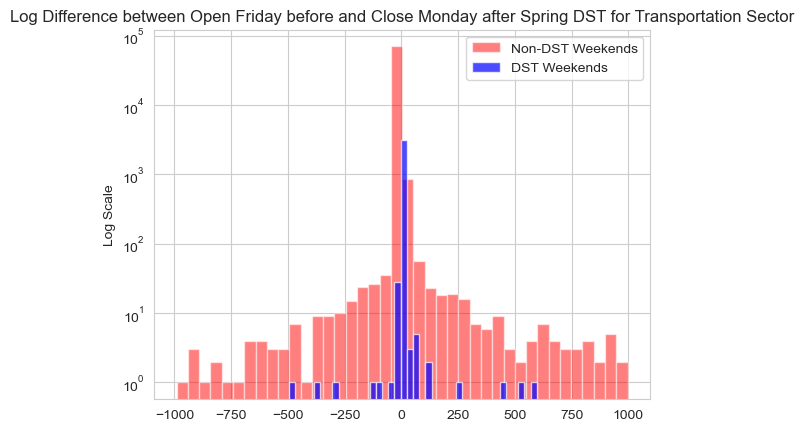

In [85]:
# plotting the differences between open Friday and close Monday for DST and non-DST weekends
# the bin widths are different because the spread is different between the two

plt.hist(transport_non_dst_diff,color='r',bins=40,log=True,alpha=0.5, label='Non-DST Weekends')

plt.hist(transport_dst_diff,color='b',bins=40,log=True,alpha=0.7, label='DST Weekends')

plt.title('Log Difference between Open Friday before and Close Monday after Spring DST for Transportation Sector')
plt.ylabel('Log Scale')
plt.legend()
plt.show()

In [86]:
print(np.var(transport_non_dst_diff))
print(np.var(transport_dst_diff))

print(np.mean(transport_non_dst_diff))
print(np.mean(transport_dst_diff))

print(np.median(transport_non_dst_diff))
print(np.median(transport_dst_diff))

641.9907466380351
466.3270531909275
0.22897130581047423
0.2856911333483549
0.0
-0.016666889190670275


In [91]:
np.save('transport_non_dst_diff.npy',transport_non_dst_diff)
np.save('transport_dst_diff.npy',transport_dst_diff)